In [1]:
#%load_ext autoreload
#%autoreload 2

from  davarocr.davar_common.apis import inference_model, init_model
import cv2
from mmcv.parallel import collate, scatter



/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True


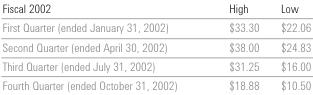

In [2]:
config_path = "/app/config_lgpma.py"
config_path = "/app/DAVAR-Lab-OCR/demo/table_recognition/lgpma/configs/lgpma_pub.py"
import os 
print(os.path.isfile(config_path))
model_path = "/app/maskrcnn-lgpma-pub-e12-pub.pth"
imgs = {'img':cv2.imread("/app/test_img.jpg")}
from PIL import Image
Image.fromarray(imgs['img'][:,:,::-1])

In [3]:
#load model
model = init_model(config_path,model_path)

Use load_from_local loader


In [4]:
from mmcv.parallel import collate, scatter
from mmdet.datasets.pipelines import Compose
import numpy as np
imgs = {'img':cv2.imread("/app/test_img.jpg")}
cfg = model.cfg
device = next(model.parameters()).device  # model device

data = imgs
def tonumpy(l):
    return np.array(l)
cfg.data.test.pipeline[1]['transforms'][1]['mean'] = \
        np.array(cfg.data.test.pipeline[1]['transforms'][1]['mean'])
cfg.data.test.pipeline[1]['transforms'][1]['std'] = \
        np.array(cfg.data.test.pipeline[1]['transforms'][1]['std'])
test_pipeline = Compose(cfg.data.test.pipeline)
data = test_pipeline(data)
device = int(str(device).split(":")[-1])
data = scatter(collate([data], samples_per_gpu=1), [device])[0]
# data['img'] = torch.mean(data['img'], dim=1, keepdim=True)

In [5]:
import torch
with torch.no_grad():
    result = model(return_loss=False, rescale=True, **data)


In [6]:
result

[{'html': '<html><body><table><thead><tr><td></td><td></td><td></td></tr></thead><tbody><tr><td></td><td></td><td></td></tr><tr><td></td><td></td><td></td></tr><tr><td></td><td></td><td></td></tr><tr><td></td><td></td><td></td></tr></tbody></table></body></html>',
  'content_ann': {'bboxes': [[3, 3, 188, 15],
    [227, 2, 262, 16],
    [279, 3, 311, 16],
    [1, 22, 188, 36],
    [227, 22, 262, 36],
    [279, 22, 311, 36],
    [1, 42, 181, 55],
    [227, 42, 262, 55],
    [279, 41, 311, 55],
    [1, 61, 180, 75],
    [227, 61, 262, 74],
    [279, 60, 311, 74],
    [1, 80, 186, 93],
    [227, 80, 262, 93],
    [279, 79, 311, 93]],
   'labels': [[0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1]],
   'texts': ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']}}]